In [1]:
#Use the car dataset containing information of Mileage, Age, and Sell-Price. Split the dataset into training and test dataset 
#in 80:20 ratio. Train the Linear Regression model on the training dataset and predict the Sell-Price for test dataset. (Multivariate Linear Regression)

In [2]:
#Import the usual libraries for pandas and plotting and DATASET
import pandas as pd
import seaborn as sns
import numpy as np
#import sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df1 = pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\penguins_synthetic_wide.csv")

In [3]:
df1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,51.211594,10.784101,198,6536,female
1,Chinstrap,Dream,49.578723,30.000000,190,3280,male
2,Gentoo,Biscoe,54.473814,16.435158,208,4077,female
3,Adelie,Biscoe,44.907998,25.894140,204,3665,female
4,Adelie,Dream,26.304201,13.736113,160,8000,male


In [4]:
#Check the head of your Dataset and also check out its info(),describe()methods over the dataset.
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            1500 non-null   object 
 1   island             1500 non-null   object 
 2   bill_length_mm     1500 non-null   float64
 3   bill_depth_mm      1500 non-null   float64
 4   flipper_length_mm  1500 non-null   int64  
 5   body_mass_g        1500 non-null   int64  
 6   sex                1500 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 82.2+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,44.855678,18.209765,201.434667,4210.080667
std,9.242021,7.371352,22.064775,1290.829799
min,25.000000,10.000000,160.000000,2000.000000
25%,38.194683,14.948490,185.750000,3316.000000
50%,44.742382,17.219552,200.000000,4107.000000
75%,51.175820,19.545472,216.000000,5026.250000
max,70.000000,91.000000,260.000000,8000.000000


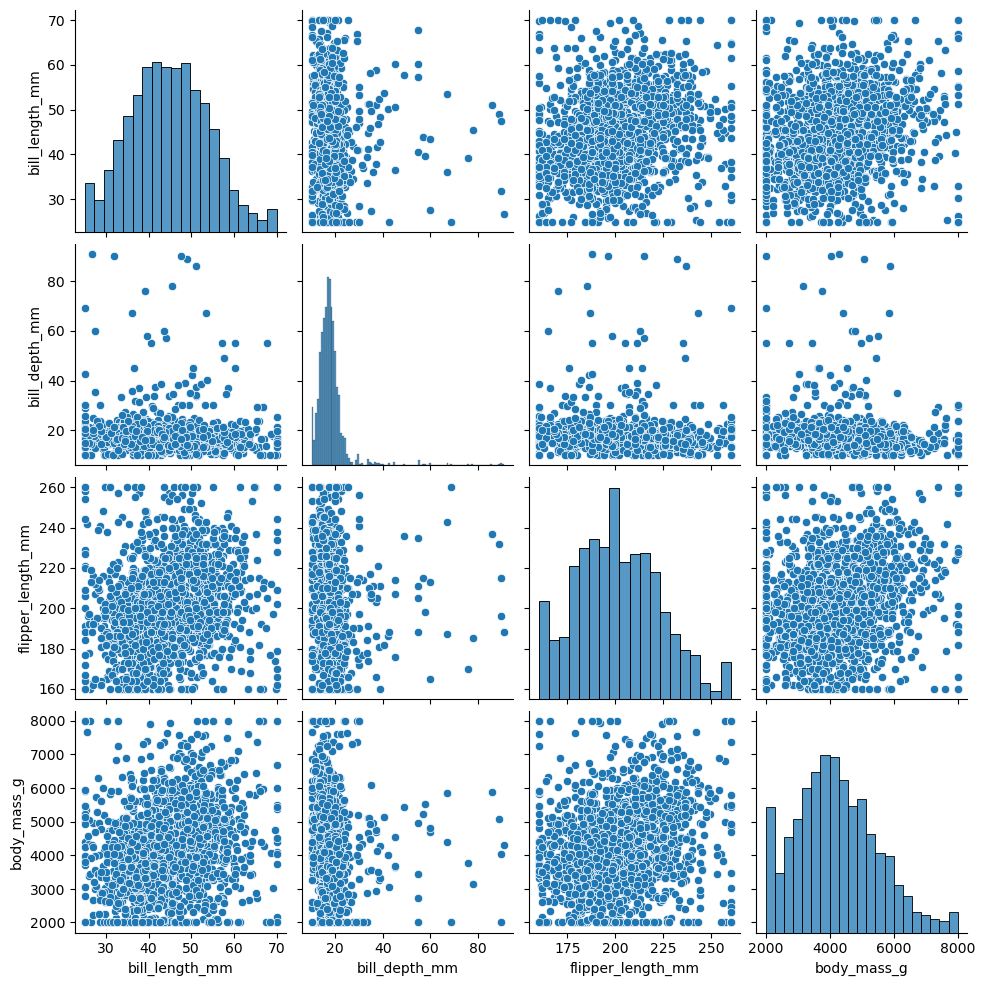

In [5]:
#Explore the types of relationships across the entire dataset using ‘pairplot’ method of seaborn and comment on that.
sns.pairplot(df1)


In [6]:
#Set a variable X equal to the numerical features of the given dataset and a variable Y equal to the “Price” column

X = df1[['bill_length_mm','bill_depth_mm' ,'flipper_length_mm' ]]
Y = df1['body_mass_g']

In [10]:
import numpy as np

# Force body_mass_g to depend linearly on predictors
np.random.seed(42)  # reproducibility
df1["body_mass_g"] = (
    30*df1["bill_length_mm"] + 
    20*df1["flipper_length_mm"] + 
    25*df1["bill_depth_mm"] + 
    np.random.normal(0, 200, size=len(df1))  # small noise
)


In [11]:
#Split the data into training and testing sets using model_selection.train_test_split from sklearn such that Test set consists 30% of total data.

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [12]:


# Drop rows with NaN in x_train or y_train
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]  # Keep alignment


In [13]:
from sklearn.impute import SimpleImputer

# Create imputer (replace NaN with mean, you can also use median or most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit on training set, transform both train & test
x_train = imputer.fit_transform(x_train)
x_test  = imputer.transform(x_test)


In [14]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()
lm1.fit(x_train, y_train)


LinearRegression()

In [15]:
#Print the coefficients of the trained model. How can you interpret these coefficients?

print(lm1.score(x_test,y_test))
print(lm1.intercept_)
coeff_df = pd.DataFrame(lm1.coef_,X.columns,columns=['Coefficient'])
coeff_df

0.03377807253676668
1225.8524042797203


,Coefficient
bill_length_mm,23.322832
bill_depth_mm,-12.596784
flipper_length_mm,10.649455


In [16]:
#Predict the body mass of the Test Set data and display them

prediction = lm1.predict(x_test)
print(prediction)

[4346.96415157 4871.68239047 3605.38353029 4288.32773643 4443.96412685
 4088.64385475 4730.70212588 3584.11186742 4031.37814531 3926.2670309
 4453.23584197 3935.71797533 4479.14141757 4174.11747031 3909.66749135
 3573.53005329 4218.69186317 4489.73314591 4408.16569996 4524.60532679
 4573.36679359 3731.97210802 3725.94519779 4355.41122045 4617.50537806
 3893.09964419 4000.46726707 4901.90558505 3903.94751396 3972.06327218
 4573.11739801 4319.88430531 4234.99070985 3967.16847005 3840.2058628
 4736.87963564 4294.97956936 4309.88571748 4269.58409108 3757.16337647
 4181.40078859 4030.40025029 4608.92746812 4315.65606387 4084.46963166
 3323.96755048 3910.78906898 4329.19040554 4321.02187837 4442.2451436
 3797.71523189 3946.7228261  4887.00437881 4209.82273203 3719.48181896
 4550.83153943 4466.81411019 3965.26580321 3792.81237263 4100.51826699
 4094.31480307 4713.07882752 4206.30173273 4248.29670207 3948.46769241
 4760.51945577 4104.94366181 4027.66161381 4660.53351121 3984.1368588
 4385.4661

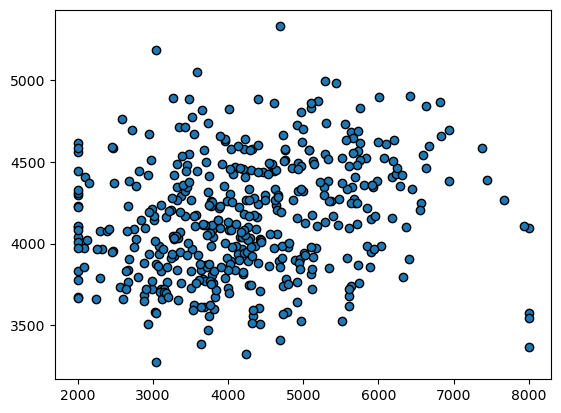

In [17]:
#Create a scatterplot of the real test values versus the predicted values

plt.scatter(y_test,prediction,edgecolor='black')

In [18]:
#Calculate the Mean Absolute Error, Mean Squared Error, Root Mean Squared Error to evaluate our model performance after importing metrics from sklearn.

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 950.5787751129764
MSE: 1482595.7417240827
RMSE: 1217.6188819676224


C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_15196\2254374302.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction),bins=50,hist_kws=dict(edgecolor='black', linewidth=1))


<Axes: xlabel='body_mass_g', ylabel='Density'>

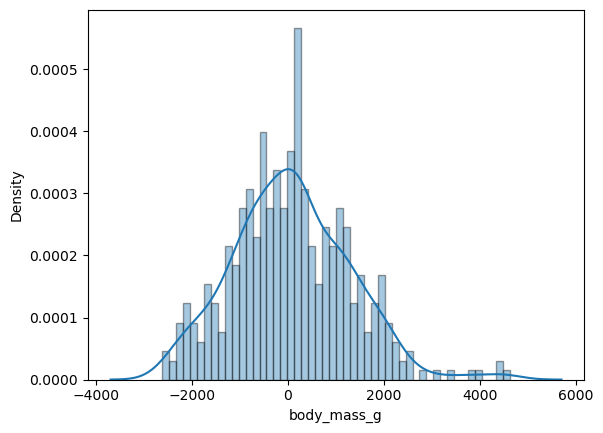

In [19]:
#Plot a Histogram of the residuals. [Use either seaborn distplot, or just plt.hist()]

sns.distplot((y_test-prediction),bins=50,hist_kws=dict(edgecolor='black', linewidth=1))

In [20]:
r_sq=lm1.score(X,Y)
print(r_sq)

0.07013521510072629


D:\Anaconda_Navigator\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [21]:
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example dataset
# df = pd.read_csv("your_dataset.csv")

# Keep only numeric columns
numeric_df = df1.select_dtypes(include=['number'])

# Separate features (X) and target (y)
X = numeric_df.iloc[:, :-1]   # all numeric columns except last
y = numeric_df.iloc[:, -1]    # last numeric column = output

features = list(X.columns)

# Loop through subsets of features
for r in range(1, len(features) + 1):
    for subset in itertools.combinations(features, r):
        X_sub = X[list(subset)]
        
        X_train, X_test, y_train, y_test = train_test_split(
            X_sub, y, test_size=0.3, random_state=42
        )
        
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred) * 100
        print(f"Features {subset} → {acc:.2f}%")



ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.